In [ ]:
import pandas as pd
import numpy as np
from scipy import interpolate
from sklearn.preprocessing import StandardScaler, normalize
from scipy.signal import argrelextrema
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# return (velocity, acceleration, jerk, curvature)
def smoothCurveFeature(curve, n, smoothing_factor):
    sx = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[0,:], k=4)
    sy = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[1,:], k=4)
    pressure_f = interpolate.UnivariateSpline(np.arange(np.shape(df[3])[0]), np.array(df[3]), k=4)

    sx.set_smoothing_factor(smoothing_factor)
    sy.set_smoothing_factor(smoothing_factor)
    pressure_f.set_smoothing_factor(smoothing_factor)

    sxdot = sx.derivative()
    sydot = sy.derivative()
    
    sxdotdot = sxdot.derivative()
    sydotdot = sydot.derivative()

    sxdotdotdot = sxdotdot.derivative()
    sydotdotdot = sydotdot.derivative()
    
    t = np.linspace(0, curve.shape[1], n)
    new_curve = np.zeros((2, n))
    new_curve[0,:] = sx(t)
    new_curve[1,:] = sy(t)

    #calculate velocity
    velocity = np.sqrt((sydot(t))**2 + (sxdot(t))**2)

    #calculate acceleration
    acceleration = np.sqrt((sydotdot(t))**2 + (sxdotdot(t))**2)

    #calculate jerk
    jerk = np.sqrt((sydotdotdot(t))**2 + (sxdotdotdot(t))**2)
    
    # calculate curvature
    curvature = (sxdot(t) * sydotdot(t) - sydot(t) * sxdotdot(t))/(sxdot(t)**2 + sydot(t)**2)**(3/2)

    pressure = pressure_f(t)
    
    # new_curve: interpolated/transformed curve, curv_spline_eval: curvature, curv_dot_eval: rate of change of curvature
    return velocity, acceleration, jerk, curvature, pressure

# duration
def duration_calc(timestamps): 
    total_duration = max(timestamps) - min(timestamps)
    return total_duration

# mean pressure
def pressure_mean(pressure):
    return np.mean(pressure)

# max pressure
def pressure_max(pressure):
    return np.max(pressure)
    
# median pressure
def pressure_median(pressure): 
    return np.median(pressure)

# pressure std
def pressure_std(pressure):
    return np.std(pressure)
    
# rate of change of pressure inversions
def rip(pressure): 
    maximum = argrelextrema(np.array(pressure), np.greater)    
    return len(maximum[0]) / duration_calc(timestamps)

In [ ]:
parkinsonhw_df = pd.read_csv('/work/5000_static_HW_features.csv')
pahaw_df = pd.read_csv('/work/5000_PaHaW_features.csv')
pahaw_df

,Subject ID,Mean Velocity,Velocity Std,Peak Velocity,NVV,NIV,Mean Acceleration,Acceleration Std,Peak Acceleration,NIA,...,Max Jerk,NIJ,NIC,Duration,Mean Pressure,Median Pressure,Peak Pressure,Pressure Std,Rate of Inversion in Pressure,Category
0,00001__1_1,11.620583,5.513776,19.277170,0.000279,0.000451,0.176869,0.059525,0.254385,0.000526,...,0.005150,0.002705,0.000676,13310,855.790365,909.309225,1002.926938,129.704749,0.000075,True
1,00002__1_1,10.213966,5.418705,19.141087,0.000377,0.000716,0.159240,0.068348,0.266862,0.000661,...,0.004812,0.001322,0.000716,18151,834.234994,844.250740,1029.517689,154.654155,0.000055,True
2,00003__1_1,8.954981,4.836050,15.428327,0.000283,0.000386,0.143531,0.074596,0.279796,0.000386,...,0.005888,0.001928,0.000707,15558,712.594255,721.040771,786.912119,59.422400,0.000129,True
3,00004__1_1,9.273792,6.908832,27.927660,0.000377,0.000637,0.175017,0.126853,0.517765,0.000637,...,0.013916,0.000637,0.000682,21994,1225.196963,1252.437757,1630.258364,226.310907,0.000273,True
4,00005__1_1,1.648309,0.965242,3.534094,0.000082,0.000130,0.005130,0.002694,0.010095,0.000122,...,0.000042,0.000130,0.000130,123097,944.082331,942.122642,1040.496862,57.907570,0.000016,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,00094__1_1,2.040446,1.477864,6.051132,0.000292,0.000386,0.019960,0.013060,0.076146,0.000343,...,0.000920,0.000901,0.000386,23300,904.173893,910.262325,1208.664371,184.431494,0.000000,False
68,00095__1_1,7.334745,4.400096,19.156957,0.000477,0.000804,0.169614,0.104224,0.575464,0.000804,...,0.016979,0.002681,0.000894,11191,1549.121777,1679.467031,1793.699175,278.814543,0.000089,False
69,00096__1_1,12.043499,8.578174,34.003327,0.000640,0.001191,0.407227,0.288332,1.063827,0.001191,...,0.039300,0.004215,0.001466,10914,785.613257,842.057252,1033.231713,194.019383,0.000275,False
70,00097__1_1,3.675758,3.116421,12.015124,0.000194,0.000248,0.050819,0.040246,0.170723,0.000198,...,0.003426,0.001140,0.000496,20173,883.290181,868.279167,1127.221869,101.210800,0.000050,False


In [ ]:
def normalize(data): # data: nparray
    normalized = []
    for i in data: 
        normalized.append((i - np.mean(data))/np.std(data))
    return normalized
print(parkinsonhw_df.columns[2:])
print(pahaw_df.columns[1:-1])

for i in parkinsonhw_df.columns[2:]: 
    parkinsonhw_df[i] = normalize(parkinsonhw_df[i])

for i in pahaw_df.columns[1:-1]: 
    pahaw_df[i] = normalize(pahaw_df[i])

Index(['Mean Velocity', 'Velocity Std', 'Peak Velocity', 'NVV', 'NIV',
       'Mean Acceleration', 'Acceleration Std', 'Peak Acceleration', 'NIA',
       'Mean Jerk', 'Jerk Std', 'Max Jerk', 'NIJ', 'NIC', 'Duration',
       'Mean Pressure', 'Median Pressure', 'Peak Pressure', 'Pressure Std',
       'Rate of Inversion in Pressure'],
      dtype='object')
Index(['Mean Velocity', 'Velocity Std', 'Peak Velocity', 'NVV', 'NIV',
       'Mean Acceleration', 'Acceleration Std', 'Peak Acceleration', 'NIA',
       'Mean Jerk', 'Jerk Std', 'Max Jerk', 'NIJ', 'NIC', 'Duration',
       'Mean Pressure', 'Median Pressure', 'Peak Pressure', 'Pressure Std',
       'Rate of Inversion in Pressure'],
      dtype='object')


In [ ]:
df = pd.concat([parkinsonhw_df, pahaw_df])
df

,Subject ID,Category,Mean Velocity,Velocity Std,Peak Velocity,NVV,NIV,Mean Acceleration,Acceleration Std,Peak Acceleration,...,Jerk Std,Max Jerk,NIJ,NIC,Duration,Mean Pressure,Median Pressure,Peak Pressure,Pressure Std,Rate of Inversion in Pressure
0,C1,0,-0.497949,-0.595563,-0.495076,-0.309658,-0.279306,-0.320100,-0.316732,-0.299761,...,-0.275174,-0.244140,-0.436262,-0.309520,-0.299541,1.327377,1.303992,0.991506,-1.120606,0.476078
1,C2,0,-0.725562,-0.773942,-0.666319,-0.343047,-0.505928,-0.347653,-0.329781,-0.309688,...,-0.277545,-0.245173,-0.612440,-0.614798,0.070573,0.654666,0.568491,0.256591,-1.687015,-0.019431
2,C3,0,-0.699614,-0.807993,-0.708805,-0.361305,-0.572474,-0.347893,-0.330996,-0.309800,...,-0.276763,-0.244384,-0.693581,-0.664817,0.710504,1.044182,0.955141,0.709567,-1.739308,-0.500733
3,C4,0,-0.612035,-0.818002,-0.673391,-0.339213,-0.605231,-0.335363,-0.313217,-0.303289,...,-0.276717,-0.244882,-0.464781,-0.497949,-0.120861,1.349890,1.303956,0.926559,-1.721095,0.234862
4,C5,0,-0.206490,-0.366551,-0.351579,-0.340458,-0.472687,-0.285233,-0.307408,-0.295132,...,-0.276417,-0.244841,-0.481722,-0.452201,-0.545993,1.552935,1.485928,1.441912,-0.676110,0.894527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,00094__1_1,0,-1.295526,-1.198676,-1.056845,-0.358244,-0.731095,-0.802119,-0.749814,-0.623097,...,-0.527091,-0.442715,-0.664208,-0.939741,0.075651,-0.262867,-0.292096,0.047380,0.432240,-1.113396
68,00095__1_1,0,-0.190600,-0.202743,0.053186,0.455218,0.461459,-0.067999,0.024925,0.291133,...,-0.019928,0.065148,0.438992,0.371501,-0.622266,1.733928,1.956201,1.705579,1.504385,-0.065381
69,00096__1_1,0,0.792123,1.221198,1.310636,1.173826,1.565450,1.097602,1.589540,1.185302,...,1.349013,0.771045,1.390054,1.851065,-0.638231,-0.629937,-0.491451,-0.449859,0.541153,2.110446
70,00097__1_1,0,-0.954234,-0.640235,-0.551710,-0.789320,-1.126025,-0.650742,-0.518784,-0.449930,...,-0.442416,-0.363473,-0.516128,-0.656856,-0.104578,-0.327524,-0.414808,-0.183457,-0.513107,-0.532008


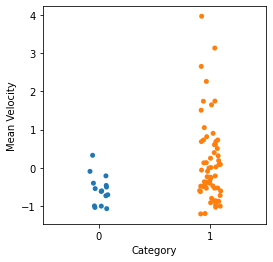

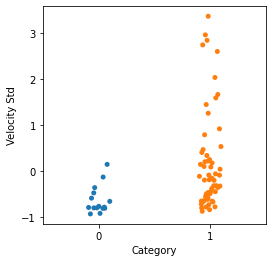

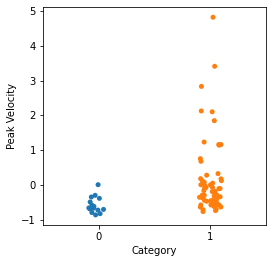

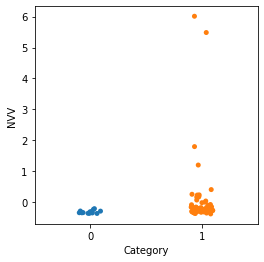

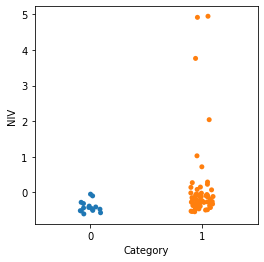

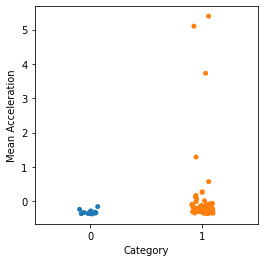

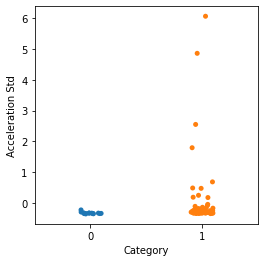

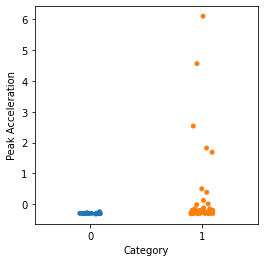

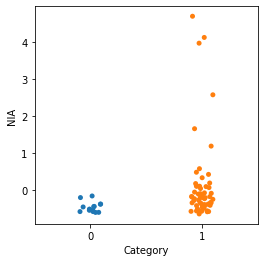

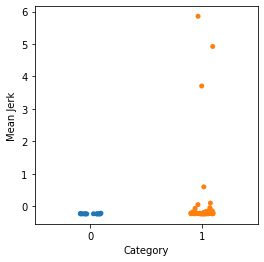

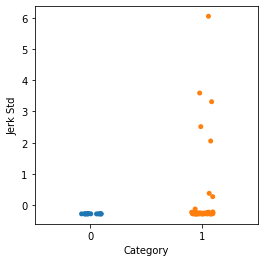

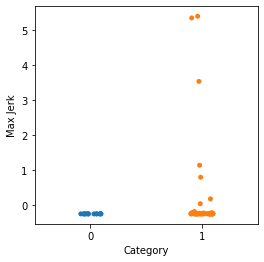

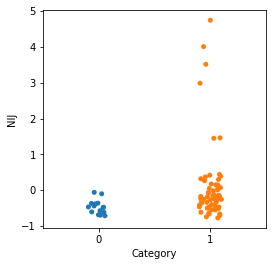

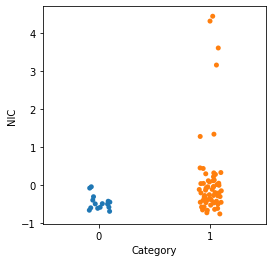

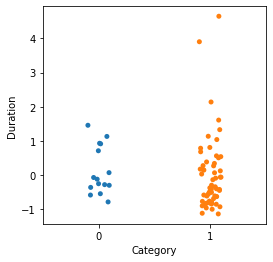

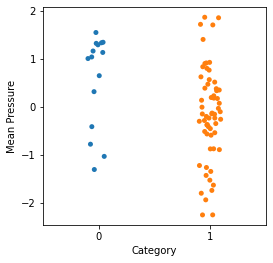

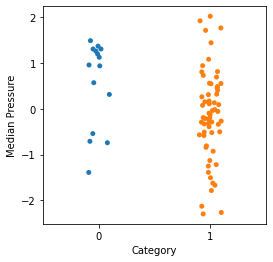

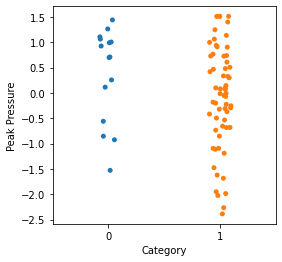

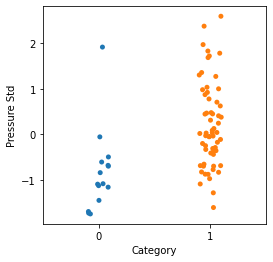

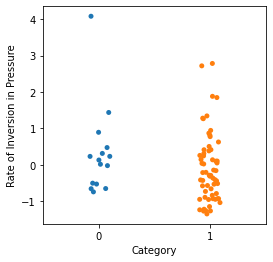

In [ ]:
for i in parkinsonhw_df.columns[2:]: 
    plt.figure(figsize = (4, 4))
    #plt.title('Strip Plot of {} vs. Category (0 - Control; 1 - Patient)'.format(i), fontsize = 15)
    sns.stripplot(x = parkinsonhw_df['Category'], y = parkinsonhw_df[i])

[0.04647604 0.05278721 0.04222123 0.05730974 0.04848883 0.04551085
 0.04566822 0.04544691 0.03793624 0.05788785 0.05143176 0.04181883
 0.05387786 0.04140679 0.04602823 0.06093566 0.05660783 0.04431646
 0.06582452 0.05801892]


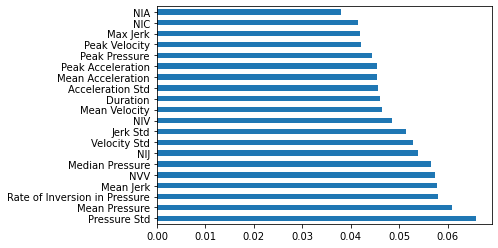

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

feature_cols = df.columns[2:].values
Xcols = df.loc[:, feature_cols]
ycols = df.Category

model = ExtraTreesClassifier()
model.fit(Xcols,ycols)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xcols.columns)
#print(feat_importances)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Text(0.5, 1.0, 'Logistic Regression ROC')

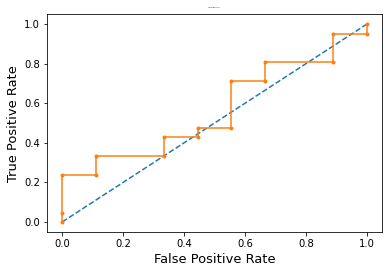

In [ ]:
# 1. import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve

feature_cols = df.columns[2:].values
X = df.loc[:, feature_cols].values
y = df.Category.values

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=1)

logreg = LogisticRegression(solver='lbfgs', max_iter = 1200000)

# 3. fit 
logreg.fit(trainX, trainy)

pred_class = logreg.predict(testX)
pred_probs = logreg.predict_proba(testX)
pred_probs = pred_probs[:, 1]

# 4. calculate scores

# generate a no skill prediction (majority class)
random_probs = [1 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_log_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate', fontsize = 13)
pyplot.ylabel('True Positive Rate', fontsize = 13)
pyplot.title('Logistic Regression ROC', fontsize = 1)

In [ ]:
print(model_log_auc)

0.5661375661375662


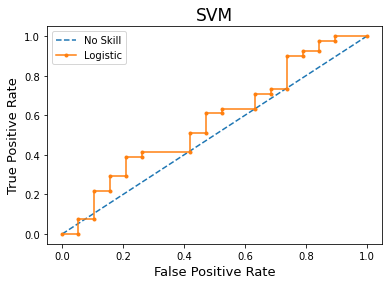

In [ ]:
from sklearn.svm import SVC

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, random_state=1)

svclassifier = SVC(kernel='linear', probability = True)

svclassifier.fit(trainX, trainy)

pred_class = svclassifier.predict(testX)
pred_probs = svclassifier.predict_proba(testX)
pred_probs = pred_probs[:, 1]


# generate a no skill prediction (majority class)
random_probs = [1 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_svc_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate', fontsize = 13)
pyplot.ylabel('True Positive Rate', fontsize = 13)
pyplot.title('SVM', fontsize = 17)

# show the legend
pyplot.legend()

pyplot.show()

In [ ]:
print(model_svc_auc)

0.5712451861360719
